In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.preprocessing import LabelEncoder

# Data import

In [2]:
# indicate your path to the data
path = "/Users/bagafoufabrice/Downloads/train.csv"
#path = "C:/Users/33695/Desktop/train.csv"

In [3]:
# Load the data from the text file into a DataFrame
df = pd.read_csv(path, sep = ',')

# Print the DataFrame
df = df.drop(['row_id'],axis = 1)
label_encoder = LabelEncoder()
df['stock_id'] = label_encoder.fit_transform(df['stock_id'])

In [4]:
# add stocks features to the dataset
#df["volume"] = df.eval("ask_size + bid_size")
#df["mid_price"] = df.eval("(ask_price + bid_price) / 2")
df["liquidity_imbalance"] = df.eval("(bid_size-ask_size)/(bid_size+ask_size)")
df["matched_imbalance"] = df.eval("(imbalance_size-matched_size)/(matched_size+imbalance_size)")
df["size_imbalance"] = df.eval("bid_size / ask_size")
#df['log_return'] = np.log(df['mid_price']).diff()
#df['log_return'] = df['log_return'].fillna(0)

In [5]:
x_cols = [c for c in df.columns if c not in ['row_id', 'time_id', 'date_id']]

means = df[x_cols].mean(0)
stds = df[x_cols].std(0)

print(df.info())
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5237980 entries, 0 to 5237979
Data columns (total 19 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   stock_id                 int64  
 1   date_id                  int64  
 2   seconds_in_bucket        int64  
 3   imbalance_size           float64
 4   imbalance_buy_sell_flag  int64  
 5   reference_price          float64
 6   matched_size             float64
 7   far_price                float64
 8   near_price               float64
 9   bid_price                float64
 10  bid_size                 float64
 11  ask_price                float64
 12  ask_size                 float64
 13  wap                      float64
 14  target                   float64
 15  time_id                  int64  
 16  liquidity_imbalance      float64
 17  matched_imbalance        float64
 18  size_imbalance           float64
dtypes: float64(14), int64(5)
memory usage: 759.3 MB
None


,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,liquidity_imbalance,matched_imbalance,size_imbalance
0,0,0,0,3180602.69,1,0.999812,13380276.64,NaN,NaN,0.999812,60651.50,1.000026,8493.03,1.0,-3.029704,0,0.754340,-0.615890,7.141326
1,1,0,0,166603.91,-1,0.999896,1642214.25,NaN,NaN,0.999896,3233.04,1.000660,20605.09,1.0,-5.519986,0,-0.728751,-0.815787,0.156905
2,2,0,0,302879.87,-1,0.999561,1819368.03,NaN,NaN,0.999403,37956.00,1.000298,18995.00,1.0,-8.389950,0,0.332935,-0.714567,1.998210
3,3,0,0,11917682.27,-1,1.000171,18389745.62,NaN,NaN,0.999999,2324.90,1.000214,479032.40,1.0,-4.010200,0,-0.990340,-0.213547,0.004853
4,4,0,0,447549.96,-1,0.999532,17860614.95,NaN,NaN,0.999394,16485.54,1.000016,434.10,1.0,-7.349849,0,0.948687,-0.951109,37.976365


## 1. Missing values

In [6]:
missing_values_count = df.isnull().sum()
print(missing_values_count)

stock_id                         0
date_id                          0
seconds_in_bucket                0
imbalance_size                 220
imbalance_buy_sell_flag          0
reference_price                220
matched_size                   220
far_price                  2894342
near_price                 2857180
bid_price                      220
bid_size                         0
ask_price                      220
ask_size                         0
wap                            220
target                          88
time_id                          0
liquidity_imbalance             87
matched_imbalance              220
size_imbalance                  87
dtype: int64


In [7]:
df['far_price'] = df['far_price'].fillna(1.0)
df['near_price'] = df['near_price'].fillna(1.0)

indices_colonne_Imb = np.where(df['imbalance_size'].isnull())[0]

valeurs_manquantes_colonne_Imb = df.loc[indices_colonne_Imb, 'date_id']

df = df[~df['date_id'].isin(valeurs_manquantes_colonne_Imb.unique())]

In [8]:
missing_values_count = df.isnull().sum()
print(missing_values_count)

stock_id                   0
date_id                    0
seconds_in_bucket          0
imbalance_size             0
imbalance_buy_sell_flag    0
reference_price            0
matched_size               0
far_price                  0
near_price                 0
bid_price                  0
bid_size                   0
ask_price                  0
ask_size                   0
wap                        0
target                     0
time_id                    0
liquidity_imbalance        0
matched_imbalance          0
size_imbalance             0
dtype: int64


In [9]:
print('Nombre de jours : ',len(df['date_id'].unique()))
print('nombre de stocks differents : ',len(df['stock_id'].unique()))

Nombre de jours :  477
nombre de stocks differents :  200


## 2. Group data

In [10]:
def regrouper_par_id_similaire(dataframe,id_):
    grouped = dataframe.groupby(id_)
    groupes = []
    for _, groupe in grouped:
        groupes.append(groupe)
    return groupes

groupes = regrouper_par_id_similaire(df,'stock_id')
groupes_datetime = regrouper_par_id_similaire(df,'date_id')

## 3. Data ploting

### a. Day 1 ask price plot for all stocks

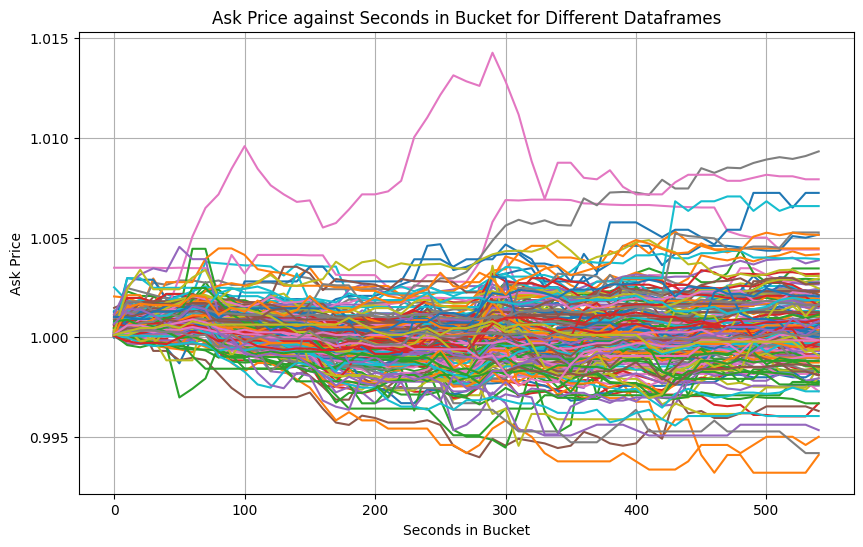

In [11]:
#a = groupes[0][groupes[0]['date_id'] == 0]
#b = groupes[1][groupes[1]['date_id'] == 0]#print(len(a['seconds_in_bucket'])/6)
#a['ask_price'].plot()
#b['ask_price'].plot()
plt.figure(figsize=(10, 6))  # Create a figure to hold the plots

for i in range(len(groupes)):
    a = groupes[i][groupes[i]['date_id'] == 0]
    plt.plot(a['seconds_in_bucket'], a['ask_price'], label=f'Dataframe {i}')  # Plot ask_price against seconds_in_bucket

plt.xlabel('Seconds in Bucket')
plt.ylabel('Ask Price')
plt.title('Ask Price against Seconds in Bucket for Different Dataframes')
#plt.legend()  # Show the legend for different dataframes
plt.grid(True)
plt.show()
    


### b. Day 1 target stock price plot for all stocks

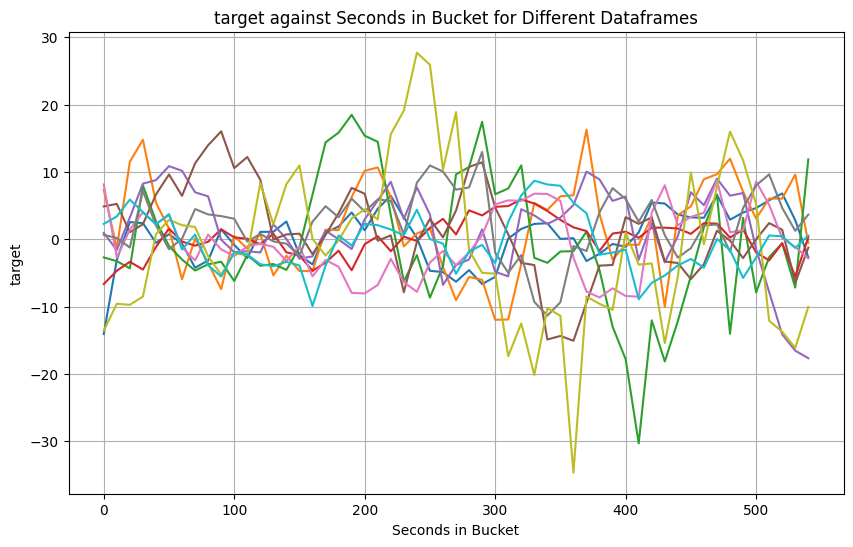

In [12]:

plt.figure(figsize=(10, 6))  # Create a figure to hold the plots

for i in range(len(groupes)-190):
    a = groupes[i][groupes[i]['date_id'] == 1]
    plt.plot( a['seconds_in_bucket'],a['target'], label=f'Dataframe {i}')  # Plot ask_price against seconds_in_bucket

plt.xlabel('Seconds in Bucket')
plt.ylabel('target')
plt.title('target against Seconds in Bucket for Different Dataframes')
#plt.legend()  # Show the legend for different dataframes
plt.grid(True)
plt.show()

### c. Sum target per/day

In [13]:
def moving_average(data, window_size):
    moving_averages = []
    for i in range(len(data) - window_size + 1):
        window = data[i:i + window_size]
        average = sum(window) / window_size
        moving_averages.append(average)
    return moving_averages

In [14]:
import plotly.graph_objects as go

target_sum1 = []
target_sum2 = []
for i in range(len(groupes_datetime)):
    target_sum1.append(groupes_datetime[i]['target'].sum())
    target_sum2.append(groupes_datetime[i][groupes_datetime[i]['stock_id'] == 2 ]['target'].sum())

window = 10
Mooving_average = result = moving_average(target_sum1, window)

#plt.plot(,target_sum)


fig = go.Figure()

fig.add_trace(
    go.Scatter(x = [i for i in range(len(groupes_datetime))], 
            y = target_sum1, 
            name = 'Target variable 200 stock',
            line = dict(color = 'green'))
) 
fig.add_trace(
    go.Scatter(x = [i for i in range(len(groupes_datetime))], 
            y = Mooving_average, 
            name = f'mooving average on a {window} lenght window',
            line = dict(color = 'blue'))
) 


## Data preparartion

### Spotting the missing stocks for each day and each second in bucket + Normalization of the data

In [15]:
def normalize_column_with_z_score(df, column_name):
    column = df[column_name]
    
    mean_value = means[column_name]
    std_value = stds[column_name]
    
    normalized_column = (column - mean_value) / std_value
    
    df[column_name] = normalized_column
    return df[column_name]

In [16]:
dates_groupes = []
target = []
x_cols.remove('target')
x_cols.remove('seconds_in_bucket')
x_cols.remove('stock_id')
for i in range(len(groupes_datetime)):
    dates_groupes.append(regrouper_par_id_similaire(groupes_datetime[i],'time_id'))

stock = [i for i in range(200)]

stock_id_manquant =[]

for i in range(len(dates_groupes)):
    for k in range(len(dates_groupes[i])):
        Stock_liste = dates_groupes[i][k]['stock_id'].unique()        
        difference = [item for item in stock if item not in Stock_liste]
        stock_id_manquant.append([difference,i,k])


for i in range(len(dates_groupes)):
    target_inter = []
    for k in range(len(dates_groupes[i])) :
        
        target_inter.append(dates_groupes[i][k]['target'].values)
        #adding velocity
        dates_groupes[i][k]['imbalance_velocity'] = dates_groupes[i][k]['imbalance_size'].diff().fillna(0)
        dates_groupes[i][k]['ask_velocity'] = dates_groupes[i][k]['ask_price'].diff().fillna(0)
        dates_groupes[i][k]['imbalance_acceleration'] = dates_groupes[i][k]['imbalance_velocity'].diff().fillna(0)
        dates_groupes[i][k]['wap_velocity'] = dates_groupes[i][k]['wap'].diff().fillna(0)
        dates_groupes[i][k] = dates_groupes[i][k].drop(['time_id','date_id','target','seconds_in_bucket'],axis = 1)
        #if k != 0 :
            #dates_groupes[i][k] = dates_groupes[i][k].drop(['seconds_in_bucket'],axis = 1)
        for p in (x_cols) : 
            dates_groupes[i][k][p]  = normalize_column_with_z_score(dates_groupes[i][k],p)
        dates_groupes[i][k] = dates_groupes[i][k].values
    
    target.append(target_inter)

### Convert to list

In [17]:
for i in range(len(dates_groupes)) :
    for k in range(len(dates_groupes[i])):
        dates_groupes[i][k] = dates_groupes[i][k].tolist() 

In [18]:
for i in range(len(target)) :
    for k in range(len(target[i])):
        target[i][k] = target[i][k].tolist() 

### Insert missing stock data

Stock missing data stored in "stock_id_manquant"
We are inserting lists of 0 for missing stock and we will give less weights for our RNN conerning the stocks were proportionnaly to missing data.

In [19]:
colonn_number = 18

def inser_0_list(data,day,second_in_bucket,stock):
    list_to_add = [0]*colonn_number
    list_to_add.insert(0,stock)
    #print(list_to_add)
    data[day][second_in_bucket].insert(stock, list_to_add)
    return data

Adding data to X_values

In [20]:
for i in range(len(stock_id_manquant)):
    day = stock_id_manquant[i][1]
    seconds = stock_id_manquant[i][2]
    for stock_id in stock_id_manquant[i][0]:
        dates_groupes = inser_0_list(dates_groupes,day,seconds,stock_id)

Adding values to target

In [21]:
def inser_target_list(data,day,second_in_bucket,stock):
    data[day][second_in_bucket].insert(stock, 0)
    return data


In [22]:
for i in range(len(stock_id_manquant)):
    day = stock_id_manquant[i][1]
    seconds = stock_id_manquant[i][2]
    for stock_id in stock_id_manquant[i][0]:
        target = inser_target_list(target,day,seconds,stock_id)

In [23]:
len(dates_groupes[0][0][102])

19

### Reshaping data

In [25]:
for i in range(len(dates_groupes)):
    for j in range(len(dates_groupes[i])):
        inter_array = np.array(dates_groupes[i][j])
        reshaped = inter_array.reshape(-1)
        #print(inter_array)
        dates_groupes[i][j] = reshaped.tolist()
    

### Add seconds in buckets and date [0,5]

In [26]:
for i in range(len(dates_groupes)):
    for seconds in range(len(dates_groupes[i])):
        dates_groupes[i][seconds].insert(0,seconds*10)
        

dates_groupes -> shape(481,55,2600)
* 481 -> number of dates
* 55 -> number on data per day
* 2600 -> number of features per data

target -> shape(481,55,200)

## Model definition

In [27]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence

Attention class to integrate in the LSTM

LSTM Model

In [28]:
class MyLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size,num_layers):
        super(MyLSTM, self).__init__()

        self.seq_size = input_size

        self.conv1 = nn.Conv1d(in_channels=1, out_channels=2, kernel_size=3, stride=1, padding=1)
        #self.conv2 = nn.Conv1d(in_channels=8, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv1d(in_channels=2, out_channels=1, kernel_size=3, stride=1, padding=1)
        self.relu = nn.ReLU()
        
        self.out_size = self.calculate_output_size()

        #self.dropout = nn.Dropout(0.2)

        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True, num_layers= num_layers)
        self.fc = nn.Linear(hidden_size, output_size)
        
        self.num_layers = num_layers


    def calculate_output_size(self):
        input_tensor = torch.randn(1, 1, self.seq_size)
        output_tensor = self.forward_conv(input_tensor)
        return output_tensor.size(2)
    
    def forward_conv(self, x):
        x = self.relu(self.conv1(x))
        #x = self.relu(self.conv2(x))
        x = self.relu(self.conv3(x))
        return x

    def forward(self, x):

        batch_size = x.size(0)
        seq_lenght = x.size(1)
        seq_size = x.size(2)  # Get the input sequence size


        #x = x.view(-1, 1, self.seq_size)

        #x = self.forward_conv(x)

        #x = x.view(batch_size, -1, self.out_size)
        h0 = torch.zeros(self.num_layers, batch_size, self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, batch_size, self.hidden_size).to(x.device)
    
        out, _ = self.lstm(x, (h0, c0))
        #out = self.dropout(out)
        out = self.fc(out)
        return out

Initialization

In [32]:
vector_size = len(dates_groupes[0][0])

input_data = torch.tensor(np.array(dates_groupes[:470]),dtype=torch.float32)
output_labels = torch.tensor(np.array(target[:470]),dtype=torch.float32)
#print(input_data.size())
input_size = vector_size
hidden_size = 150
output_size = 200
num_layers = 5


model = MyLSTM(input_size, hidden_size, output_size,num_layers)

criterion = nn.L1Loss() 
optimizer = optim.Adam(model.parameters(), lr=0.001)

## Training

In [33]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model.to(device)
input_data = input_data.to(device)
output_labels = output_labels.to(device)
#print(input_data.shape)
epochs = 100
#print(len(input_data))
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    
    optimizer.zero_grad()
    outputs = model(input_data)
    #print(outputs.size())
    #print(output_labels.size())
    loss = criterion(outputs, output_labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
    
    print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item()}")

Epoch [1/100], Loss: 6.355891704559326
Epoch [2/100], Loss: 6.3557562828063965
Epoch [3/100], Loss: 6.355594635009766
Epoch [4/100], Loss: 6.355484485626221
Epoch [5/100], Loss: 6.355338096618652
Epoch [6/100], Loss: 6.355138778686523
Epoch [7/100], Loss: 6.35500955581665
Epoch [8/100], Loss: 6.354894161224365
Epoch [9/100], Loss: 6.354737758636475
Epoch [10/100], Loss: 6.354508399963379
Epoch [11/100], Loss: 6.354372024536133
Epoch [12/100], Loss: 6.354213237762451
Epoch [13/100], Loss: 6.354006767272949
Epoch [14/100], Loss: 6.353877544403076
Epoch [15/100], Loss: 6.353676795959473
Epoch [16/100], Loss: 6.353288173675537
Epoch [17/100], Loss: 6.3529157638549805
Epoch [18/100], Loss: 6.3524603843688965
Epoch [19/100], Loss: 6.351887226104736
Epoch [20/100], Loss: 6.351279258728027
Epoch [21/100], Loss: 6.350360870361328
Epoch [22/100], Loss: 6.349377632141113
Epoch [23/100], Loss: 6.348355770111084
Epoch [24/100], Loss: 6.3470563888549805
Epoch [25/100], Loss: 6.345573902130127
Epoch 

## Test model

In [34]:
test_input_data = torch.tensor(np.array(dates_groupes[-6:]),dtype=torch.float32).to(device)
test_output_labels = torch.tensor(np.array(target[-6:]),dtype=torch.float32).to(device)

# Set the model to evaluation mode
model.eval()

# Calculate predictions on the test data
with torch.no_grad():
    test_outputs = model(test_input_data)

criterion = nn.L1Loss()
test_loss = criterion(test_outputs, test_output_labels)

print(f"Test Loss: {test_loss.item()}")

Test Loss: 5.472357749938965


## Plot test


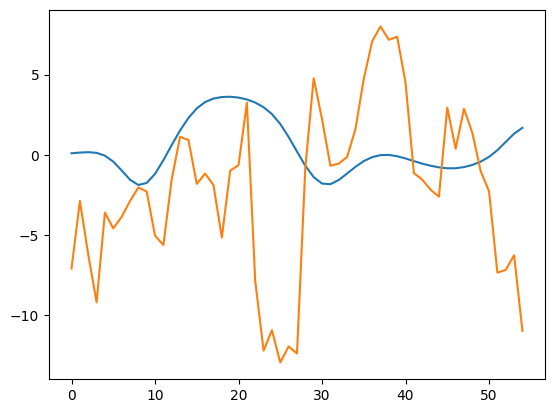

In [36]:
Y1 = [row[120] for row in test_outputs[2]]
#Y2 = moving_average([row[120] for row in test_output_labels[2]],5)
Y2 = [row[120] for row in test_output_labels[2]]

plt.plot(Y1)
plt.plot(Y2)
plt.show()

In [ ]:
waps = ['wap-derived_0','wap_derived_1']
df[df['seconds_in_buckeks'] == 0][waps] = 0